<a href="https://colab.research.google.com/github/shhreya13/Diabetes-Prediction/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
diabetes=pd.read_csv("/content/diabetes.csv")

In [13]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [15]:
diabetes.shape

(768, 9)

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
diabetes["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [20]:
y=diabetes["Outcome"]
X=diabetes.drop("Outcome", axis=1)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [23]:
from sklearn.preprocessing import StandardScaler

In [33]:
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred=model.predict(X_test)

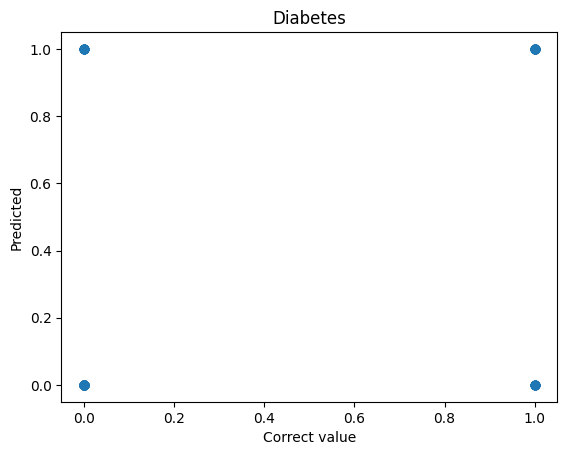

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel("Correct value")
plt.ylabel("Predicted")
plt.title("Diabetes")
plt.show()

In [43]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", roc_auc)



ROC-AUC: 0.7353535353535354


In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[79 20]
 [18 37]]


In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

